In [1]:
using CairoMakie

import LilGuys as lguys
using Arya

In [2]:
function sigma_axis(; kwargs...) 
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}"
		;kwargs...
	)

	return fig, ax
end

sigma_axis (generic function with 1 method)

In [3]:
prof_expected = lguys.StellarProfile("/astro/dboyea/sculptor/fiducial_sample_profile.toml");

In [4]:
log_r_label = "log r / arcmin"

"log r / arcmin"

In [5]:
distance = 81

81

In [6]:
function plot_finals(models, labels)
    
    fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1, 2.5), (-5, 1)),
		xgridvisible=false,
		ygridvisible=false
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		color=:black,
        label="J+24",
	)

    for i in eachindex(models)
    	lines!(models[i].log_r, models[i].log_Sigma, 
    			label=labels[i])
    end

	axislegend()

	fig
end

plot_finals (generic function with 1 method)

In [7]:
function plot_ini_fin(prof_i, prof_f, model)
    
    fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1, 2.5), (-5, 1)),
		xgridvisible=false,
		ygridvisible=false
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		color=:black,
        label="J+24",
	)

    lines!(prof_i.log_r, prof_i.log_Sigma, 
            label="initial")

    lines!(prof_f.log_r, prof_f.log_Sigma, 
            label="final")

    x = LinRange(-2, 2.5, 1000)
    r = 10 .^ x
    y = lguys.calc_Σ.(model, r)

    r_scale = lguys.kpc_to_arcmin(1, distance)

    x = x .+ log10(r_scale)
    y ./= y[1]

    lines!(x, log10.(y), linestyle=:dot, color=:black, label="expected")
	axislegend()

	fig
end

plot_ini_fin (generic function with 1 method)

## V=32, r=5.6 (the initial model)

In [11]:
model_dir = "/astro/dboyea/sculptor/orbits/orbit1/1e6_V32_r5.4/stars/"
stars_dir = "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/"

"/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/"

In [28]:
models = [
    "exp2d_rs0.07",
    "exp2d_rs0.10",
    "exp2d_rs0.20",
]

3-element Vector{String}:
 "exp2d_rs0.07"
 "exp2d_rs0.10"
 "exp2d_rs0.20"

In [29]:
names_i = [model_dir] .* models .* ["_i_profile.toml"]
names_f = [model_dir] .* models .* ["_profile.toml"]
names_profiles = [stars_dir] .* models .* [".toml"]

3-element Vector{String}:
 "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/exp2d_rs0.07.toml"
 "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/exp2d_rs0.10.toml"
 "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/exp2d_rs0.20.toml"

In [30]:
profiles = lguys.StellarProfile.(names_f);
profiles_i = lguys.StellarProfile.(names_i);

In [31]:
profile_an = lguys.StellarProfile("/astro/dboyea/dwarfs/notebooks/anake_test_profile.toml");

In [32]:
expected = lguys.load_profile.( names_profiles)

3-element Vector{LilGuys.Exp2D}:
 LilGuys.Exp2D(1.0, 0.07)
 LilGuys.Exp2D(1.0, 0.1)
 LilGuys.Exp2D(1.0, 0.2)

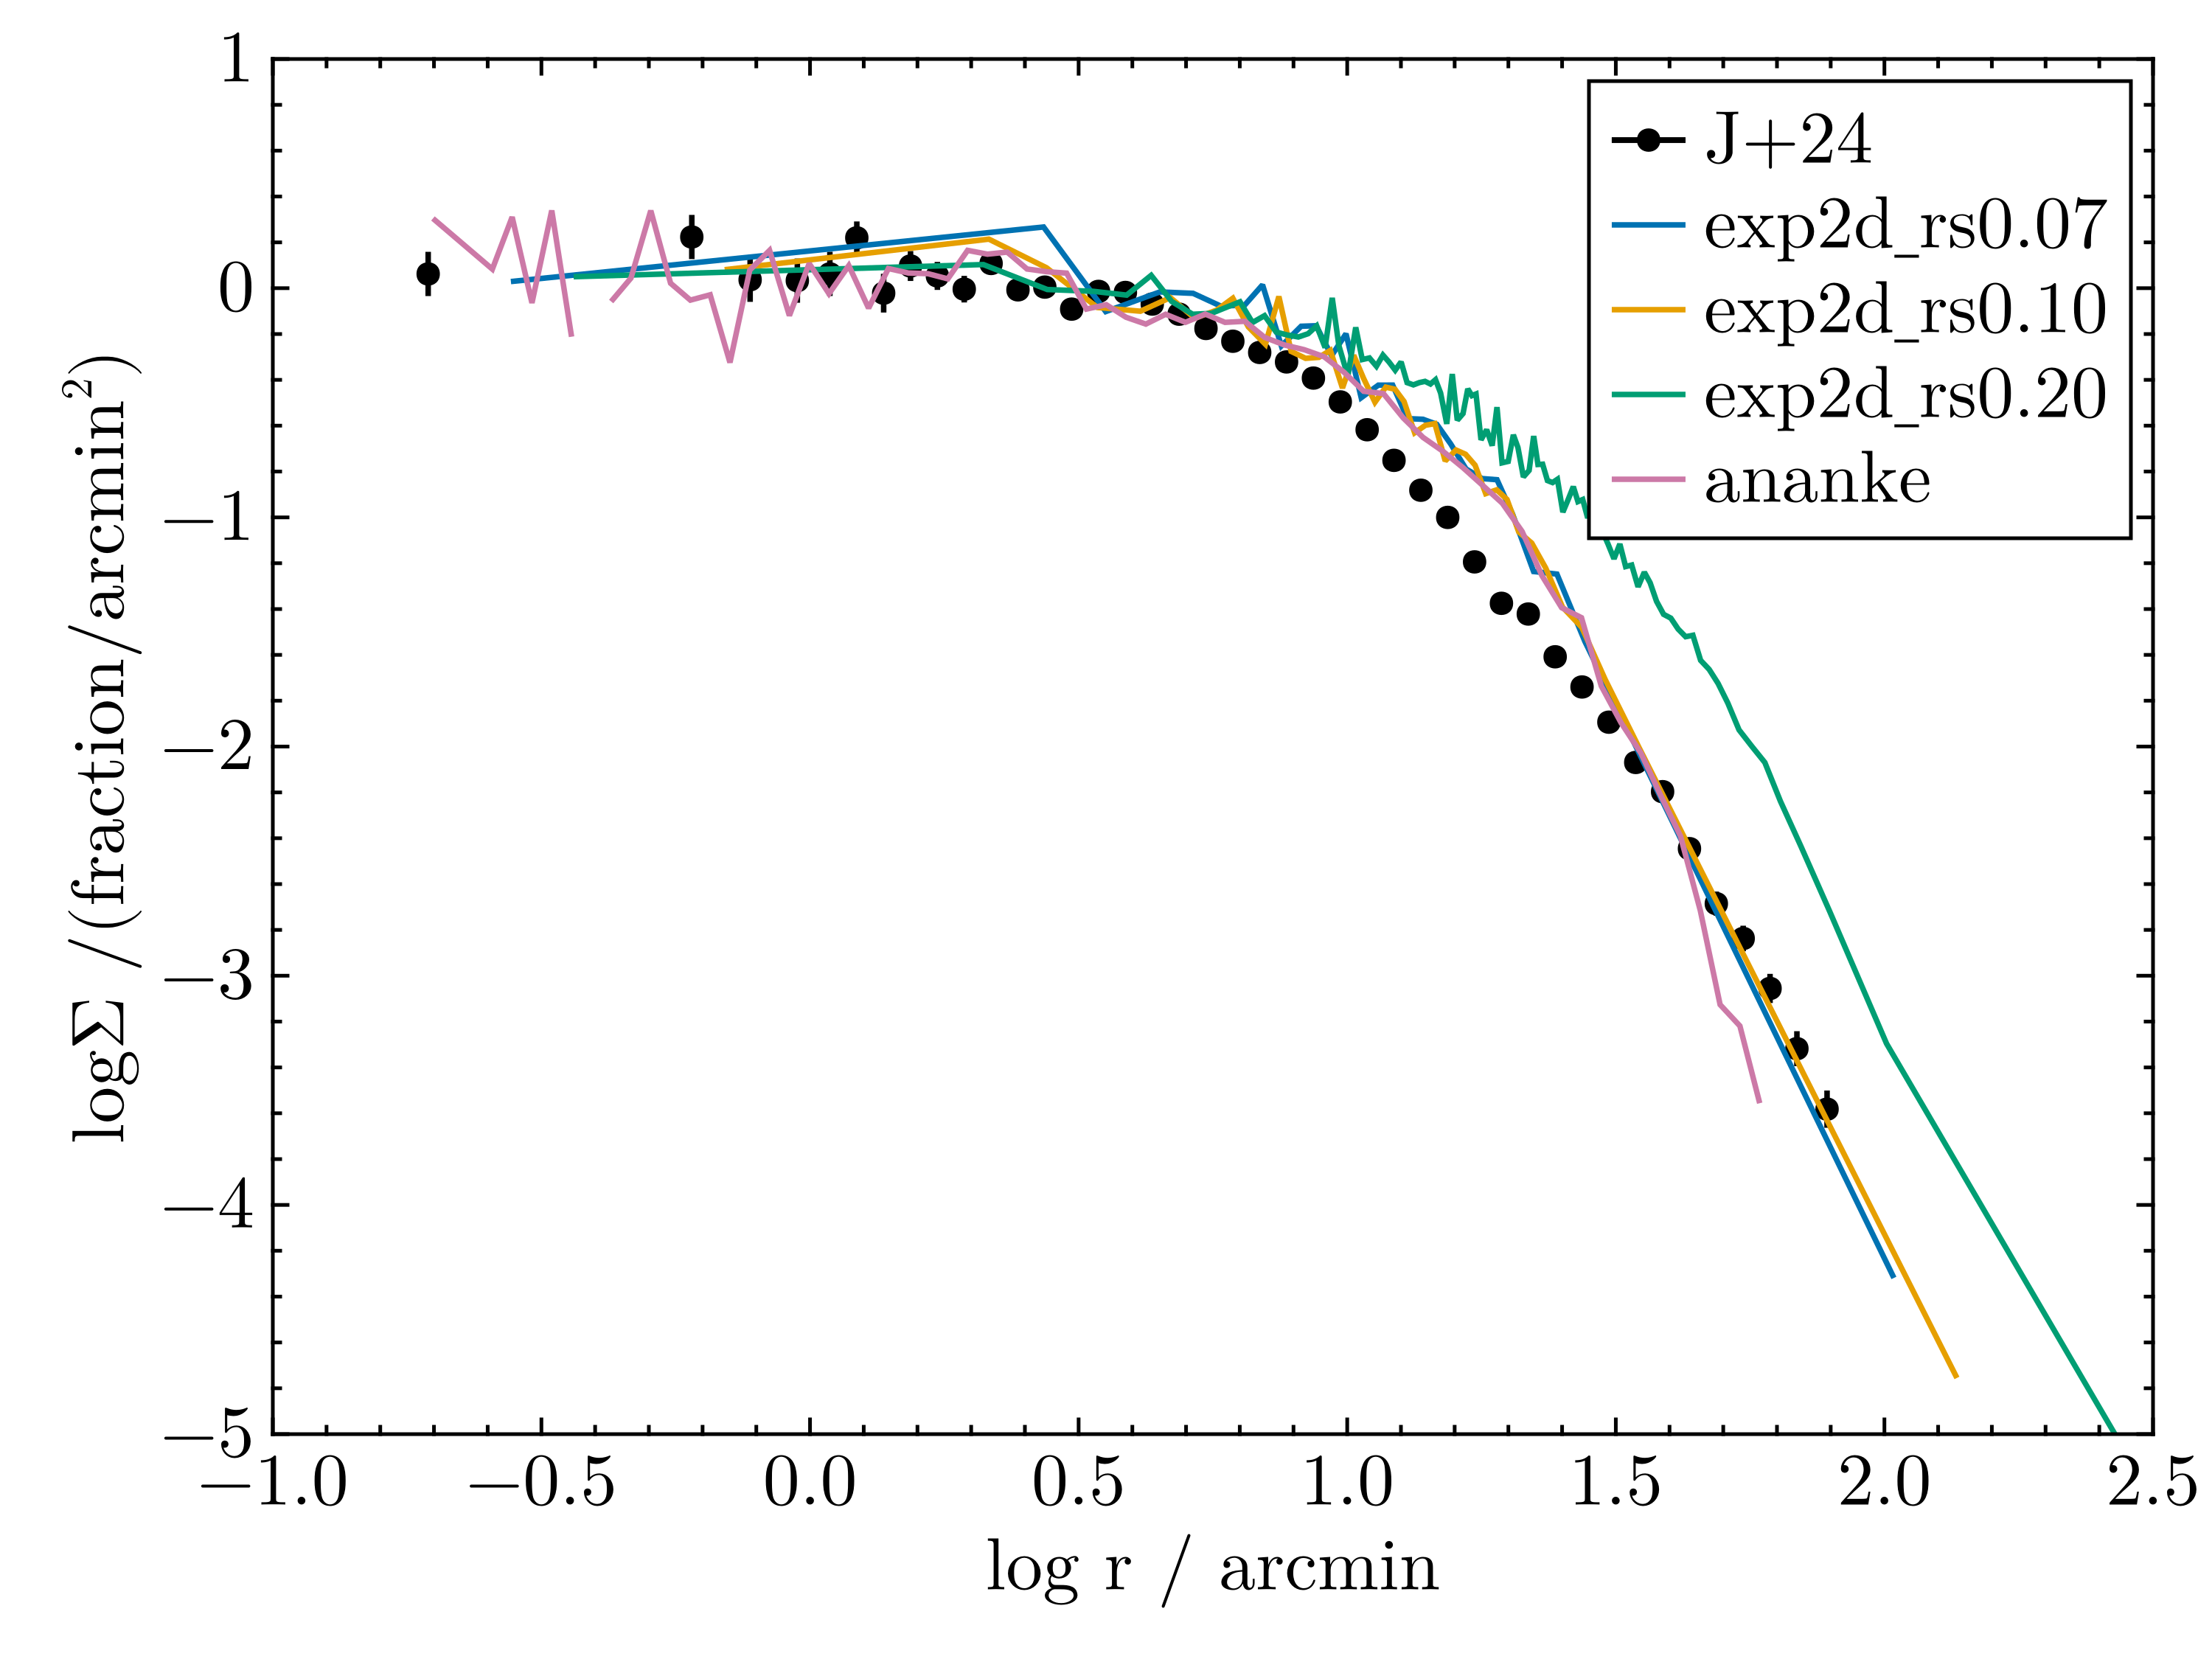

In [33]:
plot_finals([profiles; profile_an], [models; "ananke"])

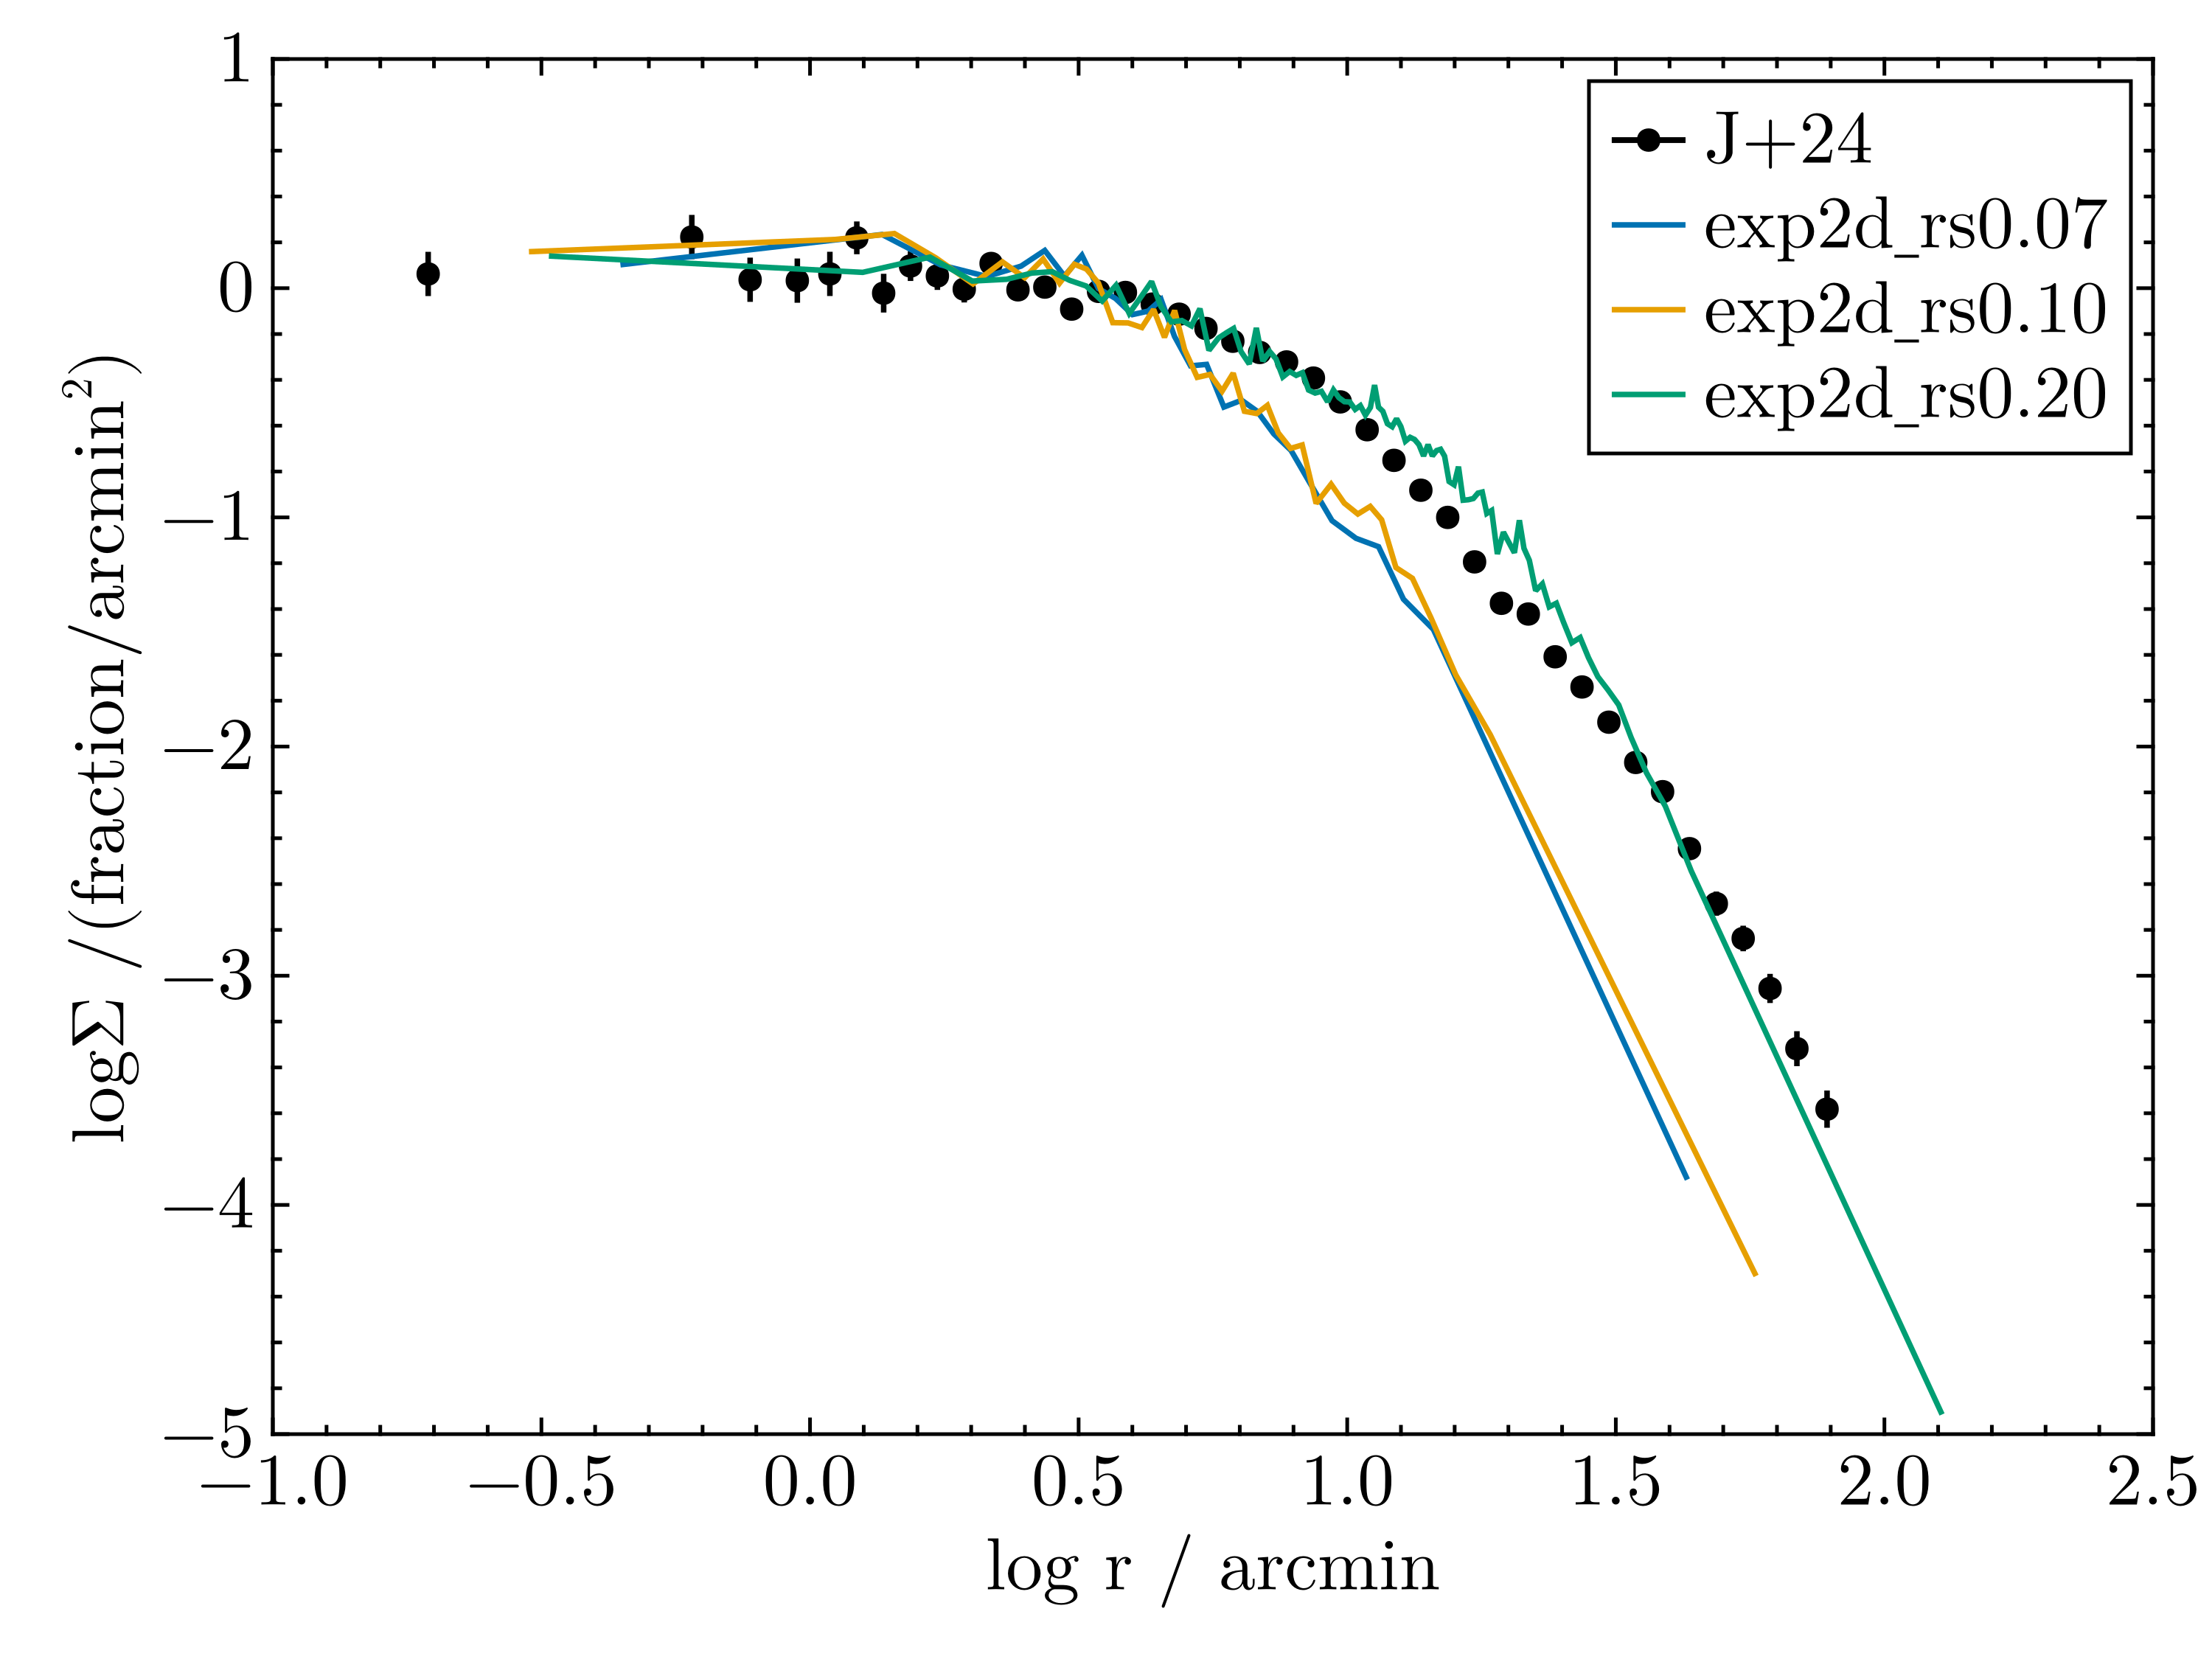

In [34]:
plot_finals(profiles_i, models)

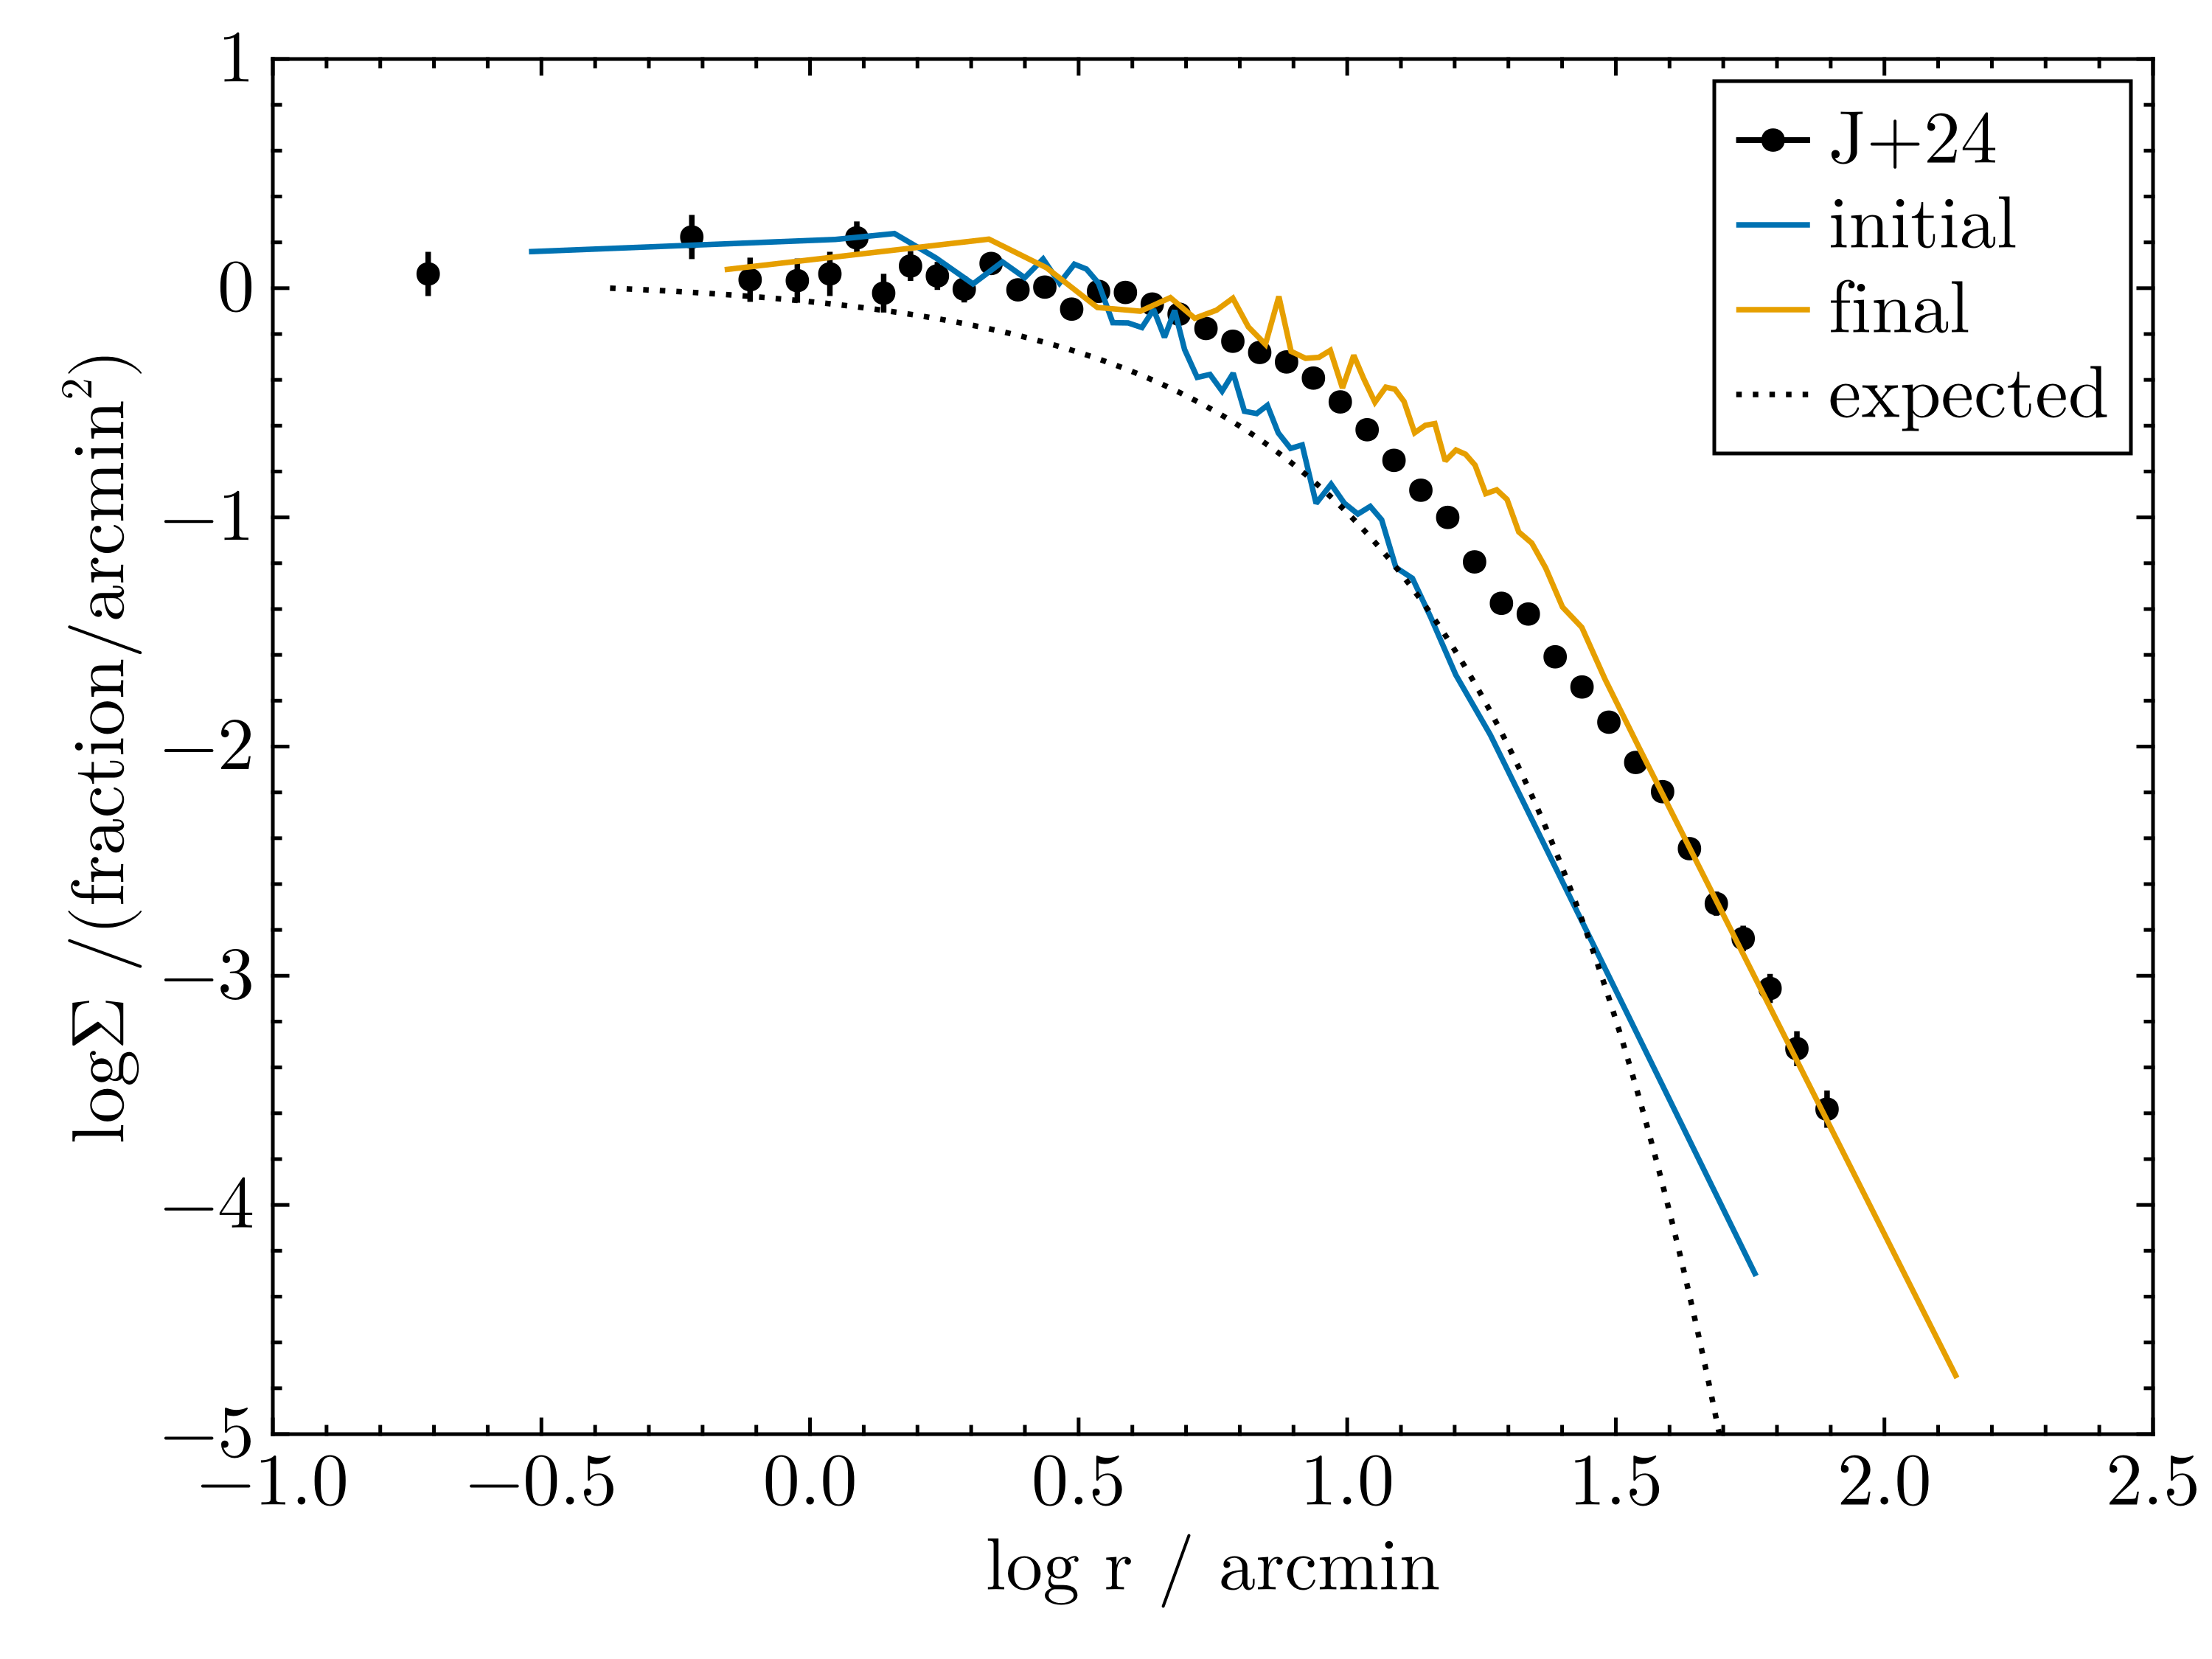

In [24]:
i = 1
plot_ini_fin(profiles_i[i], profiles[i], expected[i])

### King profiles

In [35]:
models = [
    "king_rs0.10",
    "king_rs0.15",
]

2-element Vector{String}:
 "king_rs0.10"
 "king_rs0.15"

In [36]:
names_i = [model_dir] .* models .* ["_1_profile.toml"]
names_f = [model_dir] .* models .* ["_profile.toml"]
names_profiles = [stars_dir] .* models .* [".toml"]

2-element Vector{String}:
 "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/king_rs0.10.toml"
 "/astro/dboyea/sculptor/isolation/1e6/fiducial/stars_ana/king_rs0.15.toml"

In [37]:
profiles = lguys.StellarProfile.(names_f);
profiles_i = lguys.StellarProfile.(names_i);

In [38]:
expected = lguys.load_profile.( names_profiles)

2-element Vector{LilGuys.KingProfile}:
 LilGuys.KingProfile(31.701028978468607, 0.1, 0.5)
 LilGuys.KingProfile(14.089346212652712, 0.15, 0.75)

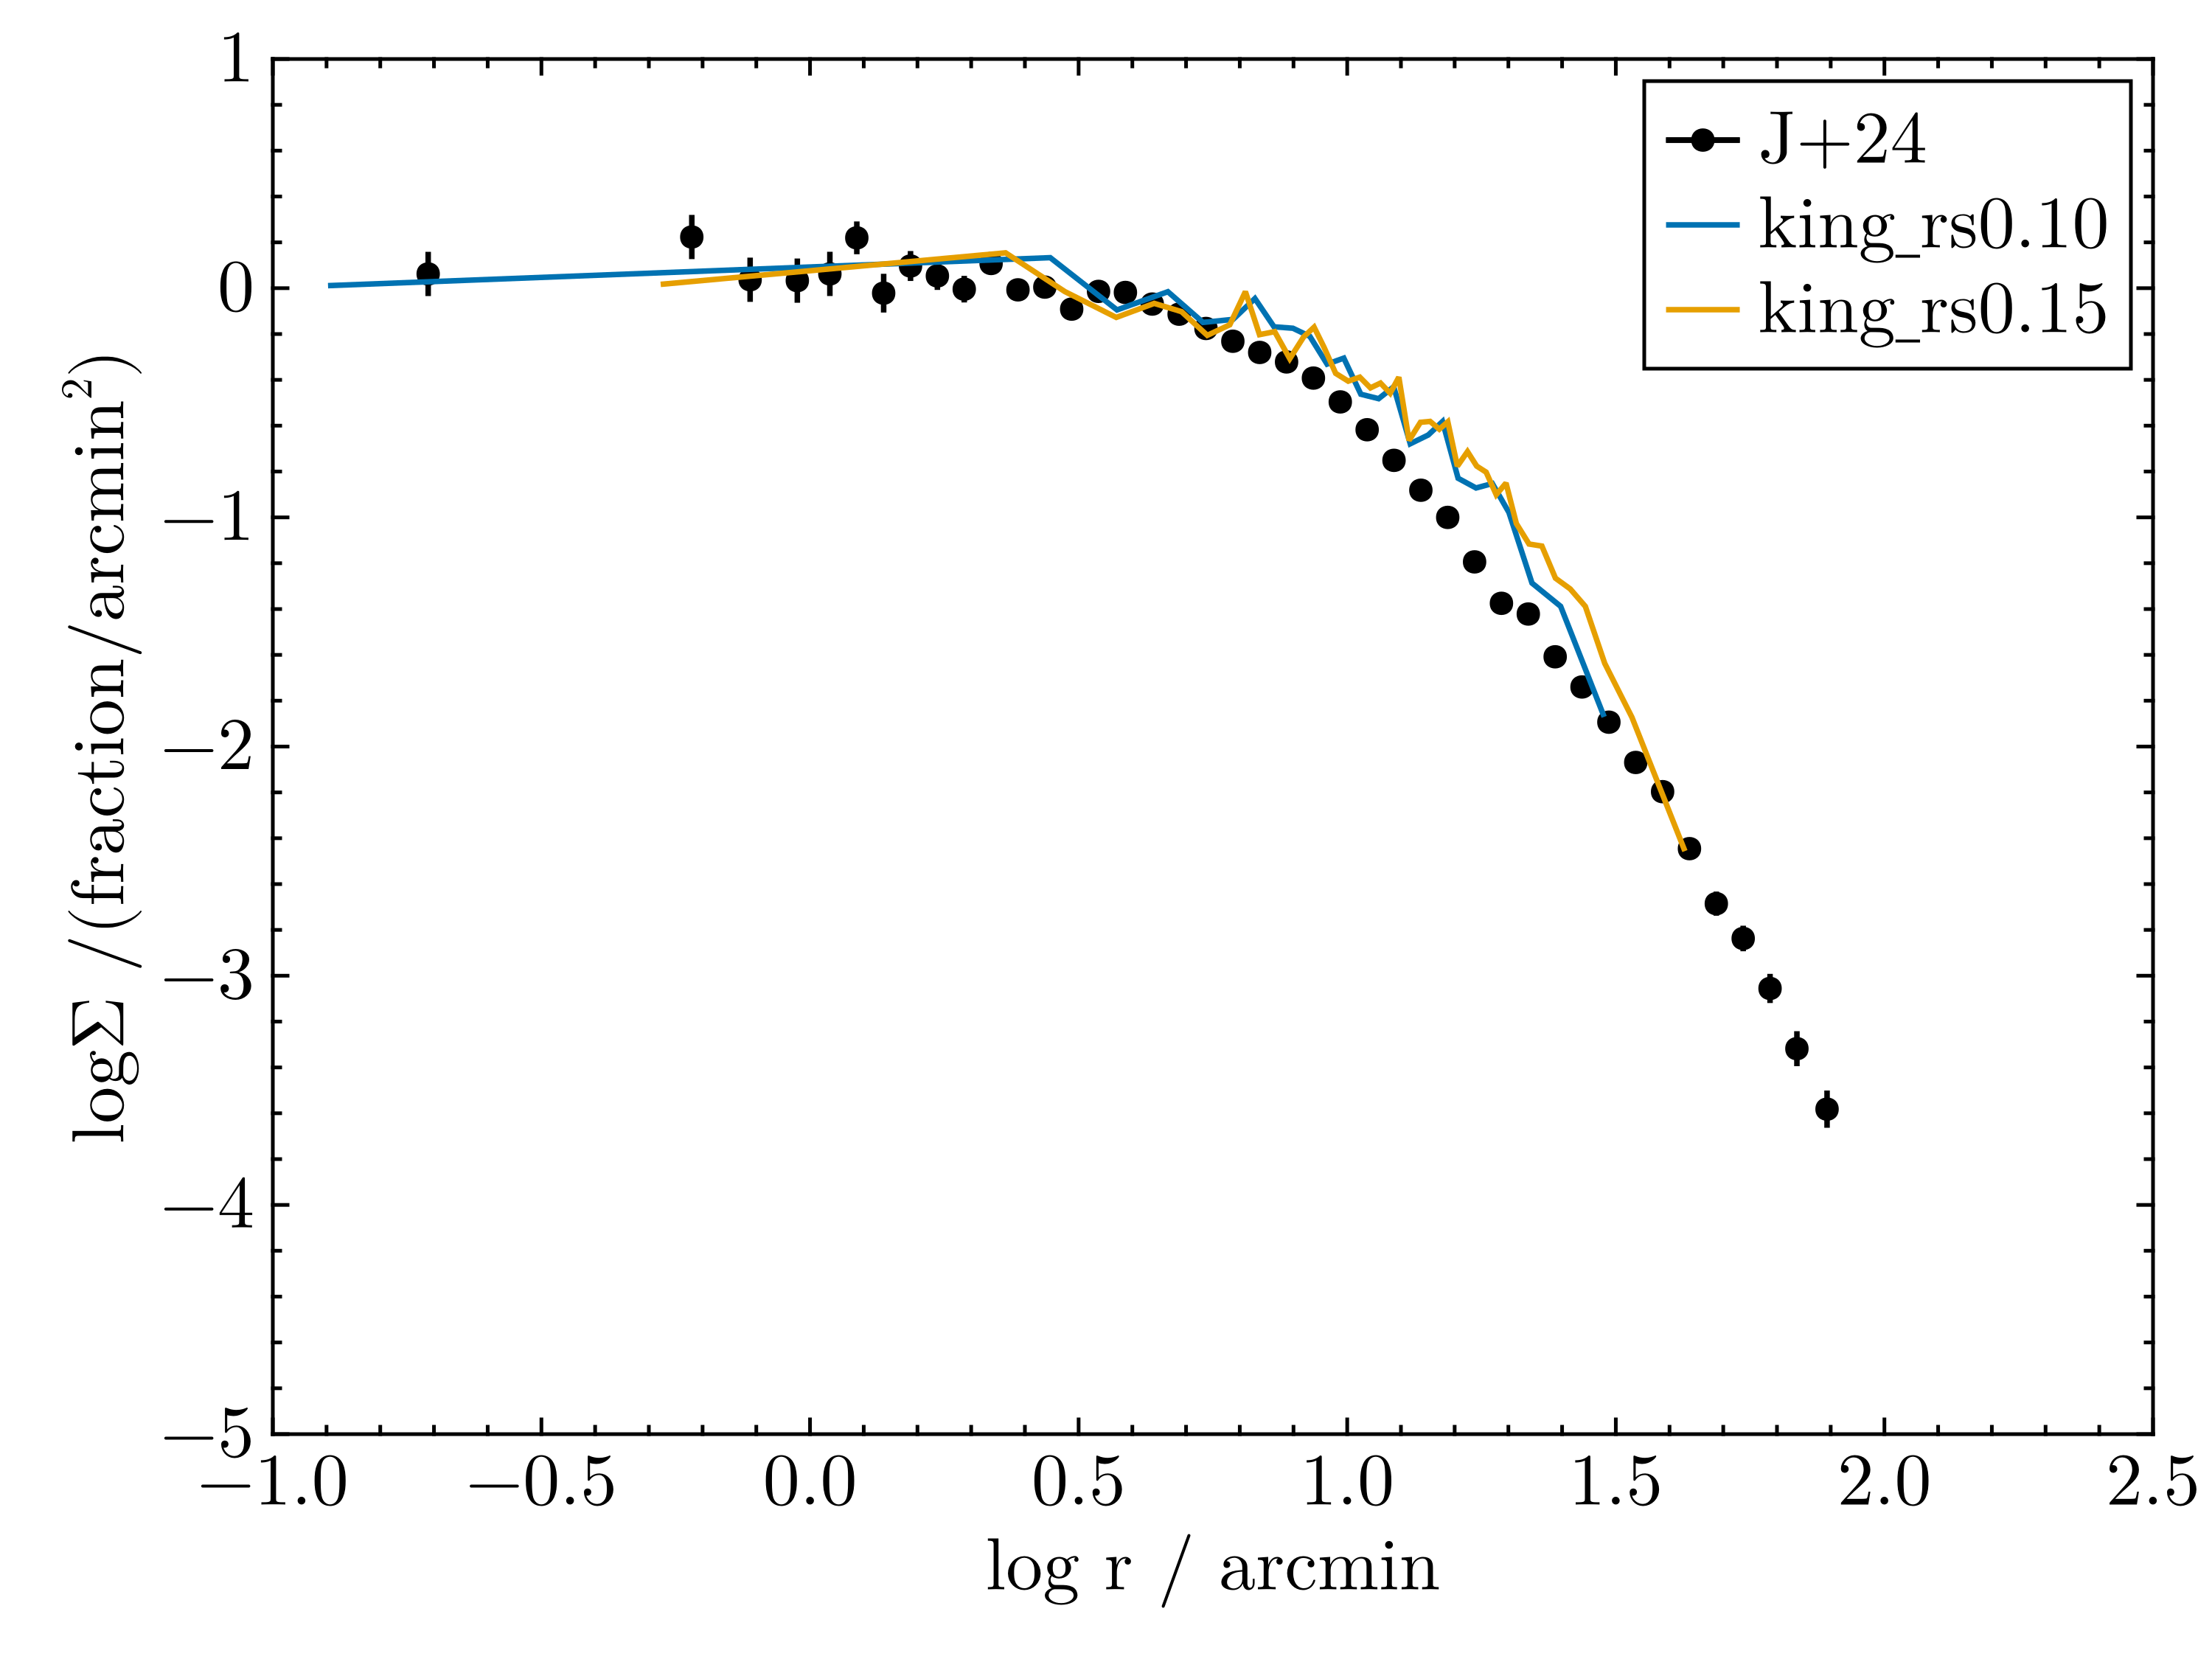

In [39]:
plot_finals(profiles, models)

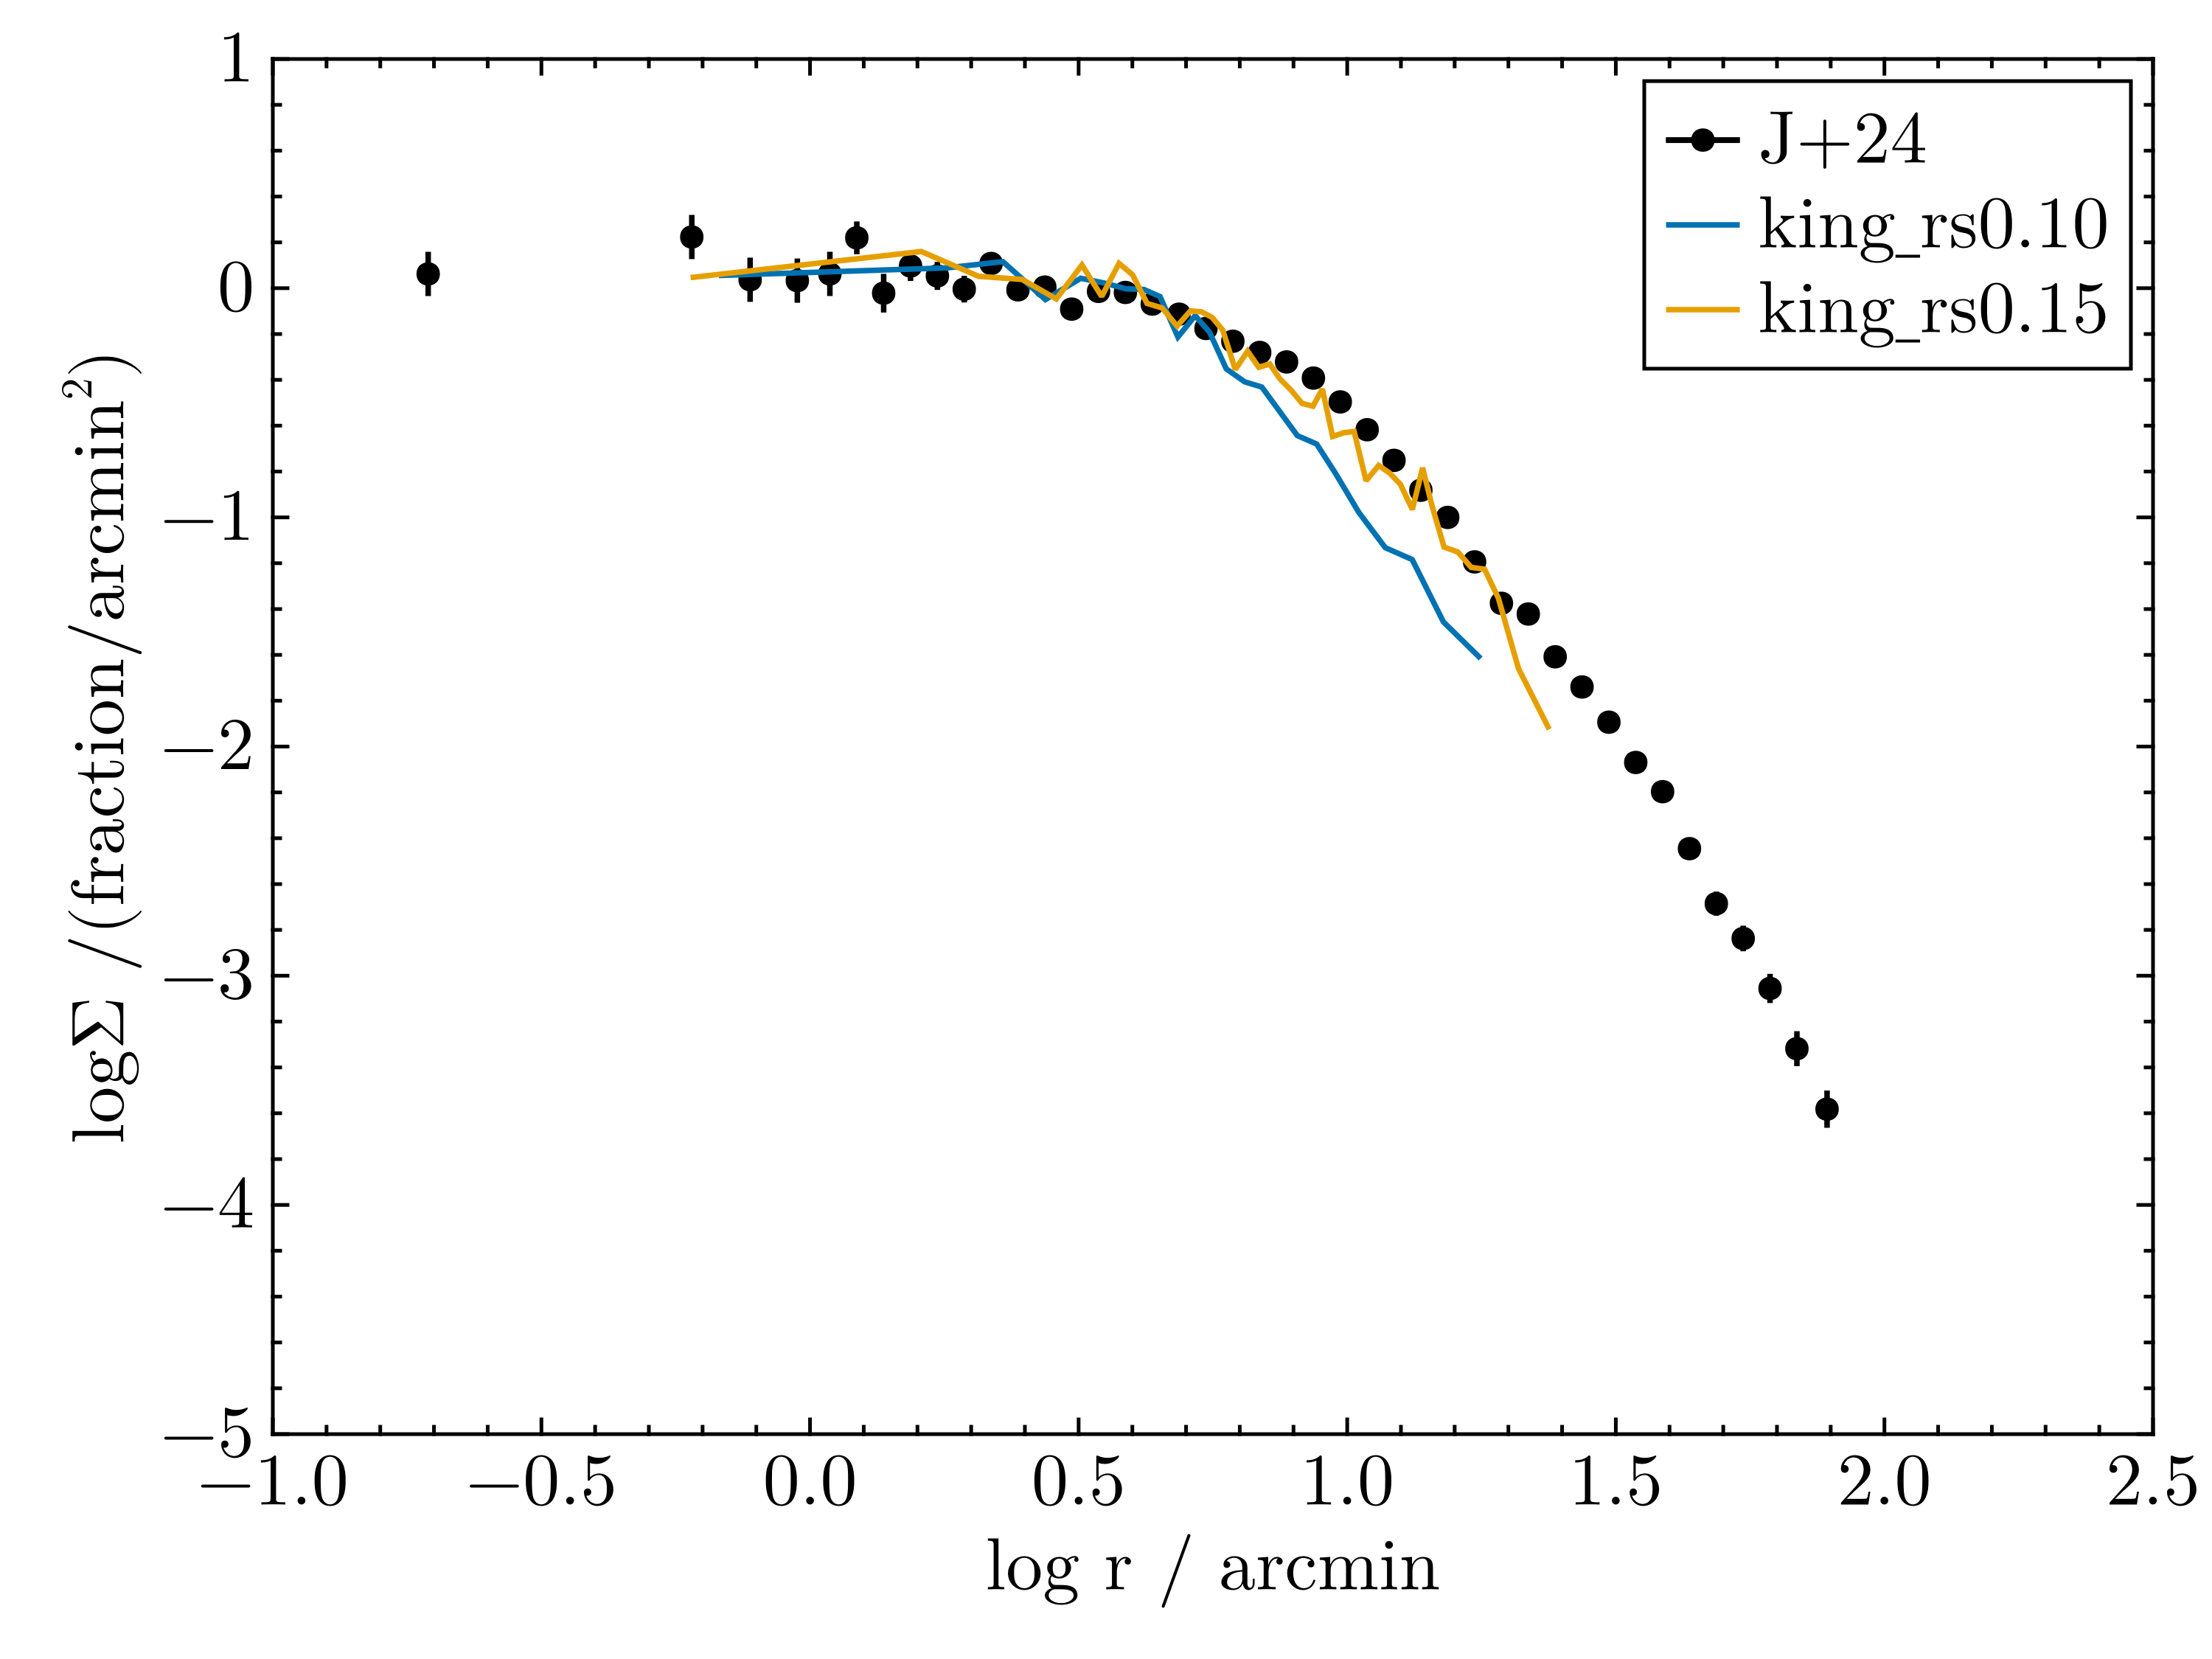

In [40]:
plot_finals(profiles_i, models)

In [43]:
expected[2].R_t

0.75

In [46]:
lguys.kpc_to_arcmin(0.75, 81)

31.83098861837907

In [47]:
log10(31)

1.4913616938342726

## i = 1
plot_ini_fin(profiles_i[i], profiles[i], expected[i])

## V=32, r=2.4

In [19]:
models = [
    #"exp2d_rs0.13",
    "king_rs0.15",
]

1-element Vector{String}:
 "king_rs0.15"

In [24]:
model_dir = "/astro/dboyea/sculptor/orbits/orbit1/1e6/V32_r2.4/stars/"
names_i = [model_dir] .* models .* ["_1_profile.toml"]
names_f = [model_dir] .* models .* ["_profile.toml"]

1-element Vector{String}:
 "/astro/dboyea/sculptor/orbits/o" ⋯ 18 bytes ⋯ "/stars/king_rs0.15_profile.toml"

In [28]:
profiles = lguys.ObsProfile.(names_f);

In [27]:
profiles_i = lguys.ObsProfile.(names_i);

In [35]:
prof_fit = lguys.KingProfile(M=1, R_s=11, R_t=25)

LilGuys.KingProfile(0.009827222561347682, 11.0, 25.0)

In [38]:
r_b = 76

76

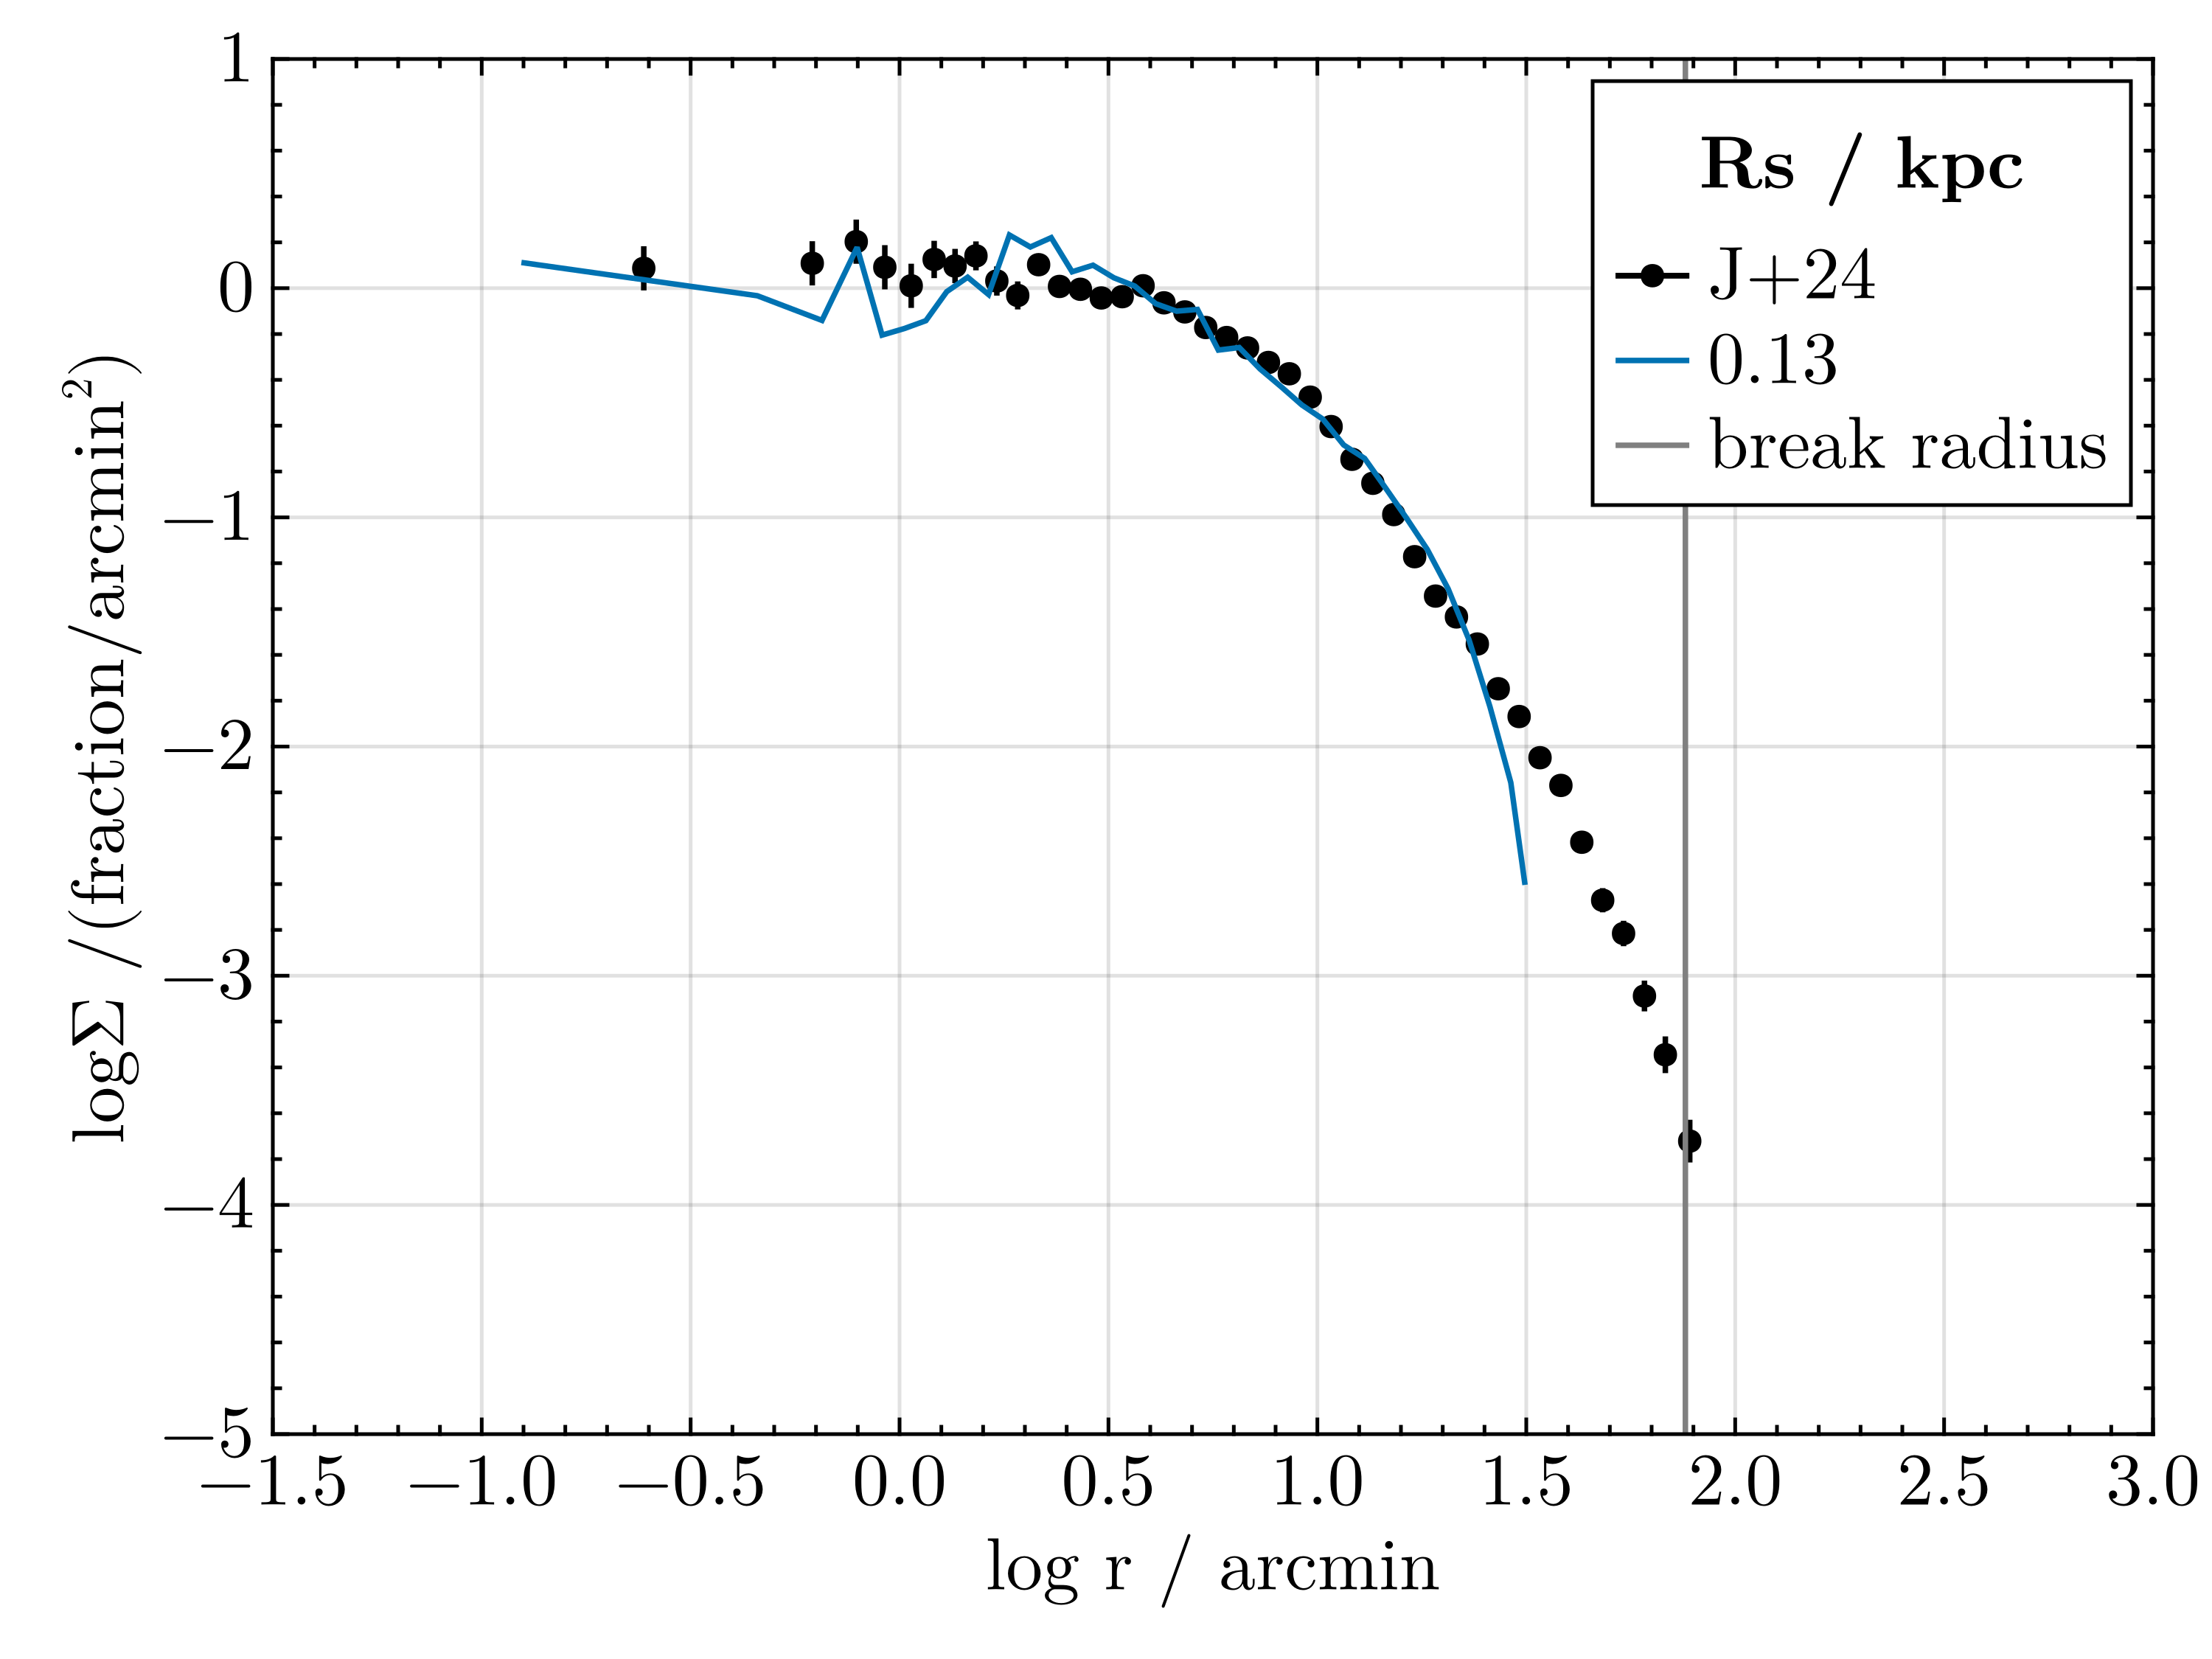

In [39]:
let 
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1.5, 3), (-5, 1))
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		label="J+24",
		color=:black
	)

	
	for i in eachindex(Rs)
		profile = profiles[i]

		label = "$(Rs[i])"
		lines!(profile.log_r, profile.log_Sigma, 
			label=label)
	end
	

	
	vlines!(log10(r_b), color=:grey, label="break radius")
	axislegend("Rs / kpc")

	fig
end

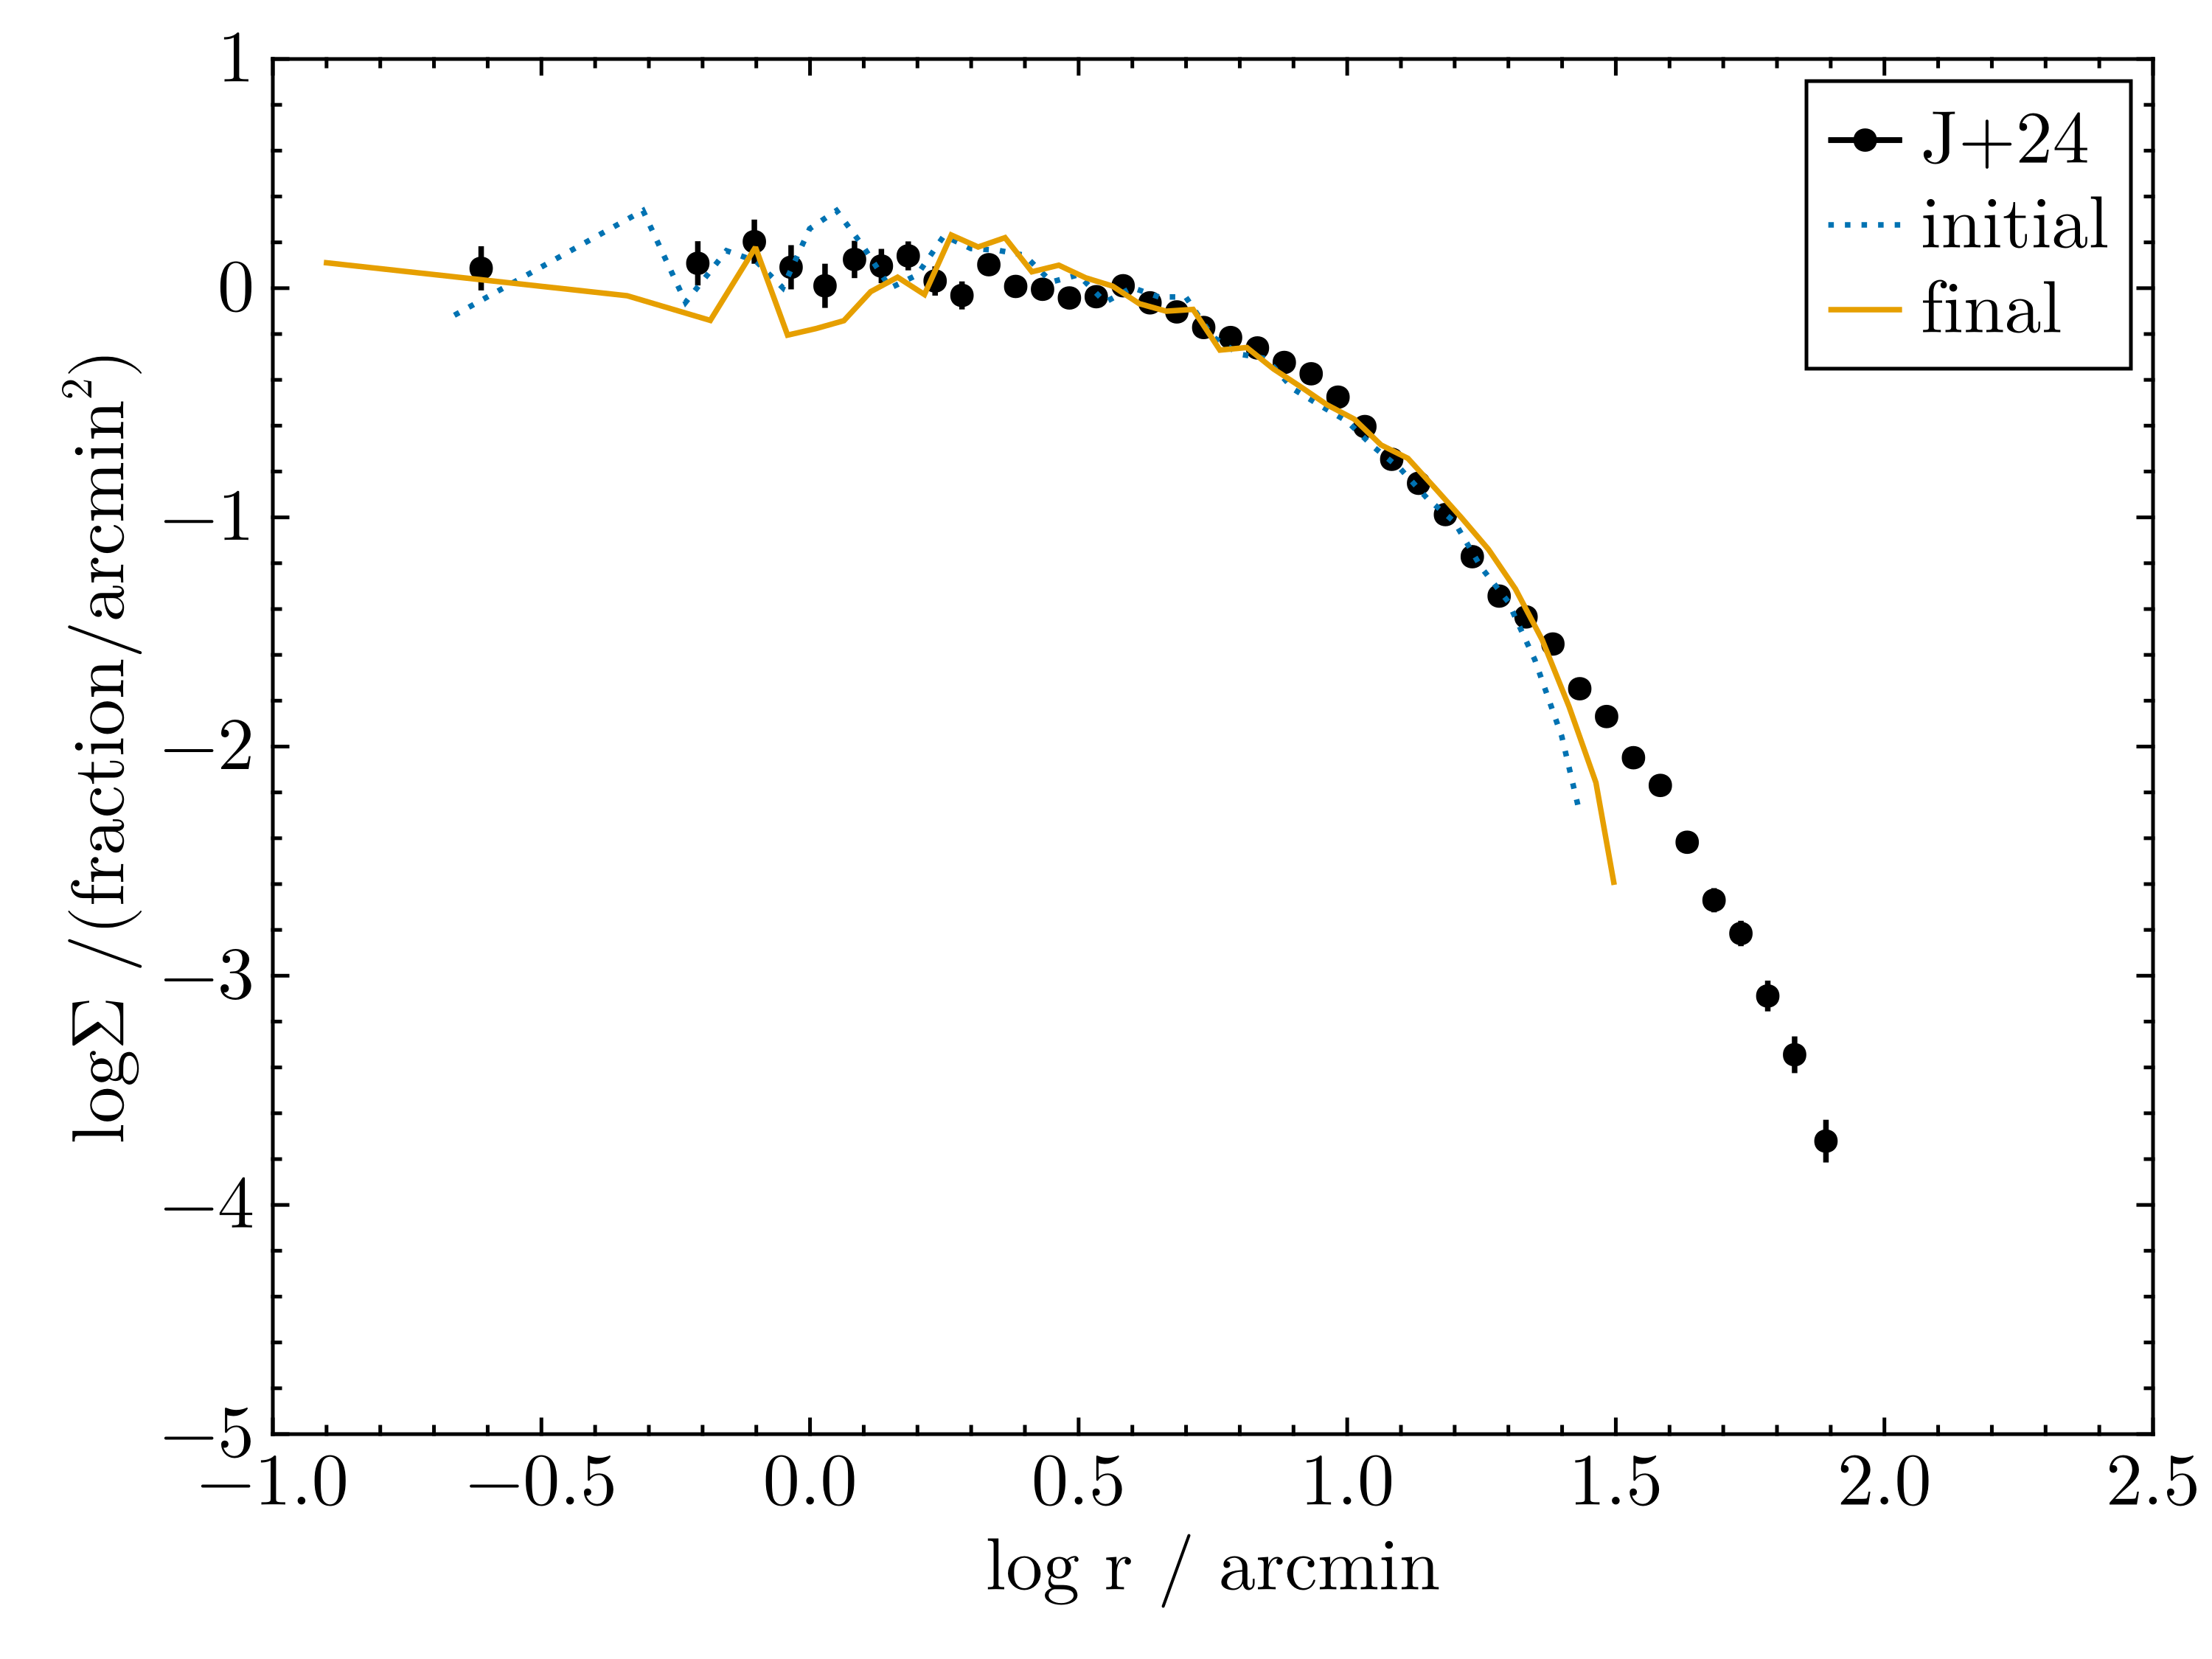

In [41]:
let
	fig = Figure()
	ax = Axis(fig[1,1], 
		xlabel=log_r_label,
		ylabel = L"\log \Sigma\ / \textrm{(fraction/arcmin^2)}",
		limits=((-1, 2.5), (-5, 1)),
		xgridvisible=false,
		ygridvisible=false
	)

	errscatter!(prof_expected.log_r, prof_expected.log_Sigma,
		yerr=prof_expected.log_Sigma_err,
		color=:black,
        label="J+24",
	)

	x = LinRange(-1, 2, 1000)
	r = 10 .^ x
	y = lguys.calc_ρ.(prof_fit, r)

	y ./= y[1]

	#lines!(x, log10.(y))

	i = 1
	lines!(profiles_i[i].log_r, profiles_i[i].log_Sigma, 
			label="initial", linestyle=:dot)
	
	lines!(profiles[i].log_r, profiles[i].log_Sigma, 
			label="final")

	axislegend()

	fig
end